In [12]:
# Import & Data definitions
import numpy as np
from keras.datasets import boston_housing
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt

EPOCHS=10
NUM_FOLDS=5
SCORES=[]; HISTORY=[]

In [3]:
(X_train, y_train),(X_test, y_test) = boston_housing.load_data()

NUM_VAL_SAMPLES=len(X_train)//NUM_FOLDS

In [4]:
# Data Normalization

tr_mean = X_train.mean(axis=0)
tr_std = X_train.std(axis=0)

X_train_norm = (X_train - tr_mean)/tr_std
X_test_norm = (X_test - tr_mean)/tr_std

In [9]:
# Model initialization

def build_model(data_shape):
    
    model = Sequential()
    model.add(Dense(64,activation='relu',input_shape=(data_shape,)))
    model.add(Dense(64,activation='relu'))
    model.add(Dense(1))
    
    model.compile(optimizer=Adam(lr=0.002),loss='mse',metrics=['mae'])
    return model

In [17]:
for i in range(NUM_FOLDS):
    print("Fold #",i)
    X_val_norm = X_train_norm[i*NUM_VAL_SAMPLES:(i+1)*NUM_VAL_SAMPLES]
    y_val = y_train[i*NUM_VAL_SAMPLES:(i+1)*NUM_VAL_SAMPLES]
    
    X_partial_norm = np.concatenate([X_train_norm[:i*NUM_VAL_SAMPLES],X_train_norm[(i+1)*NUM_VAL_SAMPLES:]],axis=0)
    y_partial = np.concatenate([y_train[:i*NUM_VAL_SAMPLES],y_train[(i+1)*NUM_VAL_SAMPLES:]],axis=0)
    
    base_model = build_model(X_train.shape[1])
    model_history = base_model.fit(X_partial_norm,y_partial,epochs=EPOCHS,batch_size=1,verbose=0)
    
    val_mse,val_mae = base_model.evaluate(X_val_norm,y_val,verbose=1)
    SCORES.append(val_mae)
    HISTORY.append(SCORES)
    
    
print("Mean MAE: ", np.mean(SCORES))
avg_mae_history = [np.mean([X[i] for X in HISTORY]) for i in range(EPOCHS)]

Fold # 0
80/80 [==============================] - 0s 2ms/step
Fold # 1
80/80 [==============================] - 0s 2ms/step
Fold # 2
80/80 [==============================] - 0s 2ms/step
Fold # 3
80/80 [==============================] - 0s 2ms/step
Fold # 4
80/80 [==============================] - 0s 2ms/step
Mean MAE:  2.5776415965136357


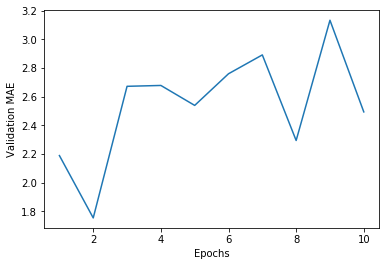

In [18]:
plt.plot(range(1,len(avg_mae_history)+1),avg_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()